In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
dataset = pd.read_csv("./heart.csv")

In [3]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


* cp = chest pain type Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic

* trestbps = resting blood pressure
* chol = serum cholestoral in mg/dl 
* fbs = fasting blood sugar > 120 mg/dl (1=true, 0=false)
* restecg = resting electrocardiographic results (values 0,1,2)
* thalach = maximum heart rate achieved 
* exang = exercise induced angina (1 = yes; 0 = no) 
* oldpeak = ST depression induced by exercise relative to rest 
* slope = the slope of the peak exercise ST segment 
* ca = number of major vessels (0-3) colored by flourosopy 
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [4]:
dataset.shape

(303, 14)

In [5]:
dataset.count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [0]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [0]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

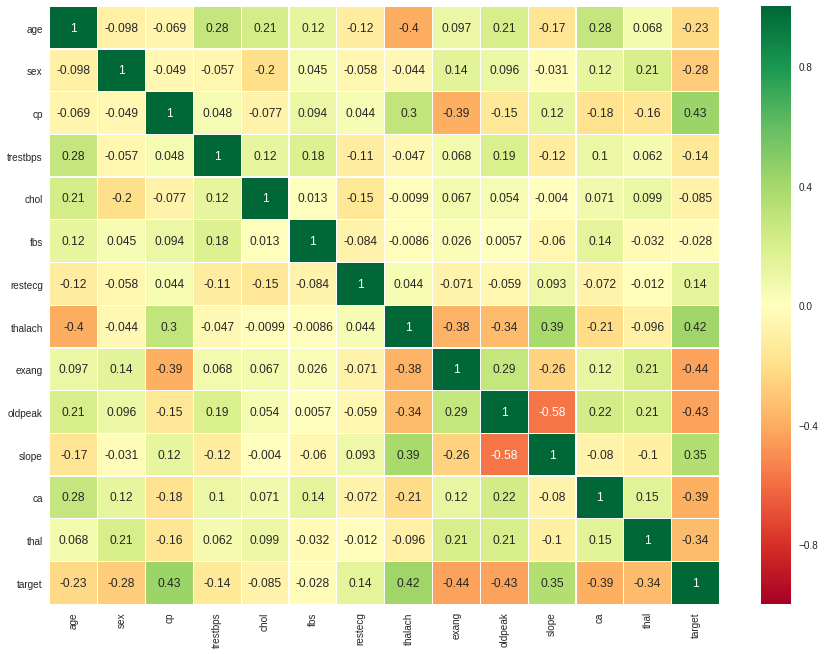

In [0]:
sns.heatmap(dataset.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
figure = plt.gcf()
figure.set_size_inches(15, 11)
plt.show()

In [0]:
dataset["cp"].unique()

array([3, 2, 1, 0])

In [0]:
dataset["thal"].unique()

array([1, 2, 3, 0])

In [0]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

In [0]:
positive_target_data = dataset[dataset["target"] == 1]
negative_target_data = dataset[dataset["target"] == 0]


def compare_hist(column):
  figure = plt.figure(figsize=(10, 6))
  ax1 = plt.subplot(2, 2, 1)
  plt.hist(positive_target_data[column], color="#e74c3c")
  plt.xlabel(column)
  ax2 = plt.subplot(2, 2, 2)
  plt.hist(negative_target_data[column], color="#3498db")
  plt.xlabel(column)
  
  ylim = (0, max(ax1.get_ylim()[1], ax2.get_ylim()[1]))
  ax1.set_ylim(ylim)
  ax2.set_ylim(ylim)
  xlim = (min(ax1.get_xlim()[0], ax2.get_xlim()[0]), max(ax1.get_xlim()[1], ax2.get_xlim()[1]))
  ax1.set_xlim(xlim)
  ax2.set_xlim(xlim)
  
def compare_bar(column):
  figure = plt.figure(figsize=(10, 6))
  ax1 = plt.subplot(2, 2, 1)
  positive_target_data[['target', column]].groupby(column).count().plot(kind='bar', rot=0, legend=False, ax=ax1, color="#e74c3c")
  ax2 = plt.subplot(2, 2, 2)
  negative_target_data[['target', column]].groupby(column).count().plot(kind='bar', rot=0, legend=False, ax=ax2, color="#3498db")
  
  ylim = (0, max(ax1.get_ylim()[1], ax2.get_ylim()[1]))
  ax1.set_ylim(ylim)
  ax2.set_ylim(ylim)
  xlim = (min(ax1.get_xlim()[0], ax2.get_xlim()[0]), max(ax1.get_xlim()[1], ax2.get_xlim()[1]))
  ax1.set_xlim(xlim)
  ax2.set_xlim(xlim)

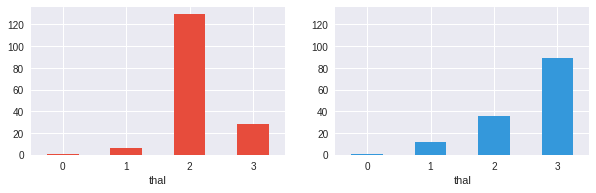

In [0]:
compare_bar("thal")

disorder called thalassemia

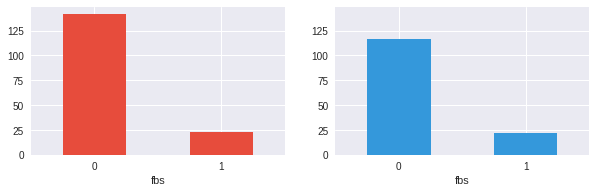

In [0]:
compare_bar("fbs")

Fasting Blood sugar

This feature can measuring diabetes. trajectories of fasting blood sugar are significantly associated with the risk of myocardio infarction.

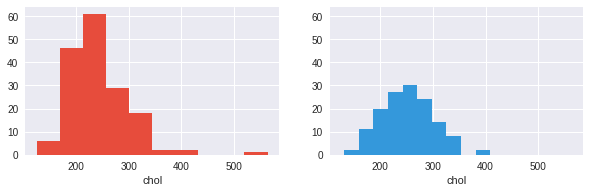

In [0]:
compare_hist("chol")

Cholesterol

People who have high cholesterol in their blood are more likely to have their blood vessels narrowed with more cholesterol. (atherosclerosis)

Coronary heart disease, which is one of the most common heart diseases, comes from lack of blood supply for the heart

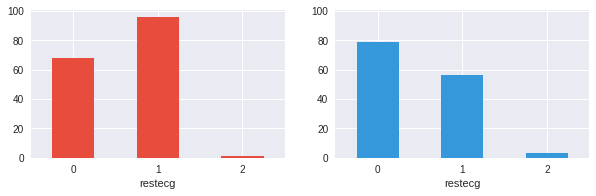

In [0]:
compare_bar("restecg")

Resting ECG

0: Normal
1: Wave anormality (T wave inversion, ST elevation ) 

T wave sign of lacking blood in endocardium
ST there are some damage to the myocardium due to the lack of blood for a relatively long period of time.

2: Showing probable or definite left ventricular hypertrophy

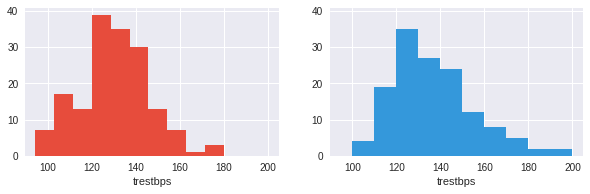

In [0]:
compare_hist("trestbps")

Resting blood pressure

Normal blood pressure is around 120/80

high blood pressure can result in congestive heart failure

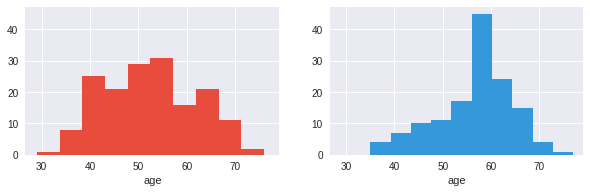

In [0]:
compare_hist("age")

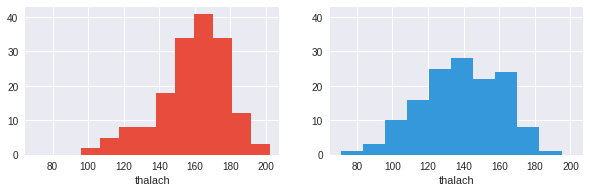

In [0]:
compare_hist("thalach")

Maximum heart rate achieved

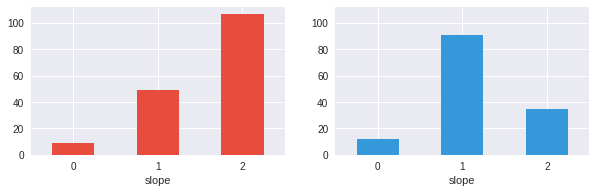

In [0]:
compare_bar("slope")

Slope of the peak exercise ST segment

0: upsloping
1: flat
2: downsloping

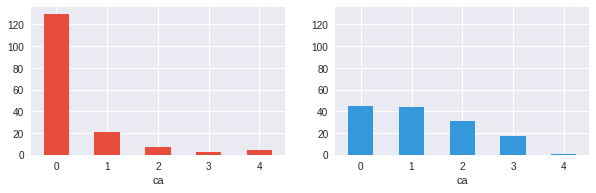

In [0]:
compare_bar("ca")

number of major visible vessels under fluorosopy

under fluorosopy only arteries that have a stable blood transmition can be shown clearly.

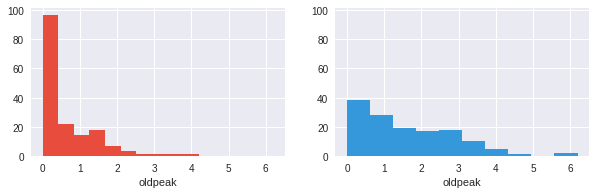

In [0]:
compare_hist("oldpeak")

ST depression induced by exercise relative to rest

In exercise, coronary arteries can introduce shortage of blood transmitted to the heart

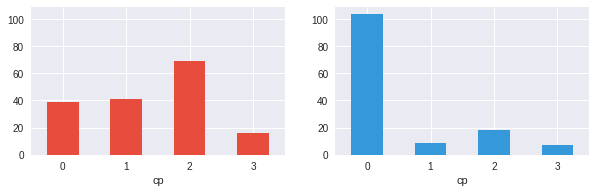

In [0]:
compare_bar("cp")

Chest pain type

* Value 0: asymptomatic
* Value 1: typical angina
* Value 2: atypical angina
* Value 3: non-anginal pain

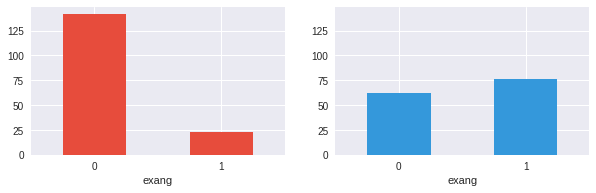

In [0]:
compare_bar("exang")

Exercise induced angina

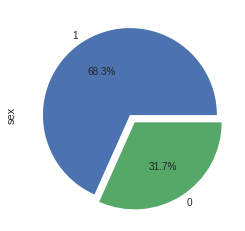

In [0]:
dataset["sex"].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%')

In [0]:
dataset.groupby("target").size()

target
0    138
1    165
dtype: int64

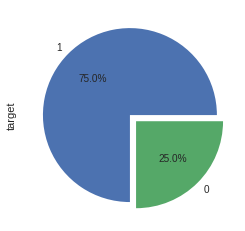

In [0]:
dataset[dataset["sex"] == 0]["target"].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%')

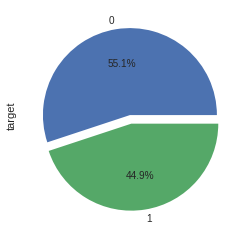

In [0]:
dataset[dataset["sex"] == 1]["target"].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%')

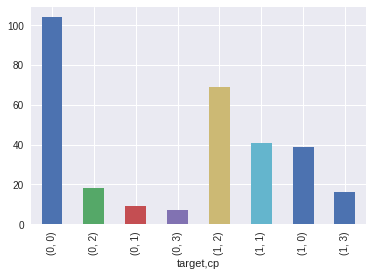

In [0]:
dataset.groupby("target")["cp"].value_counts().plot.bar()

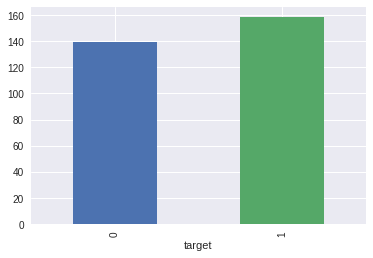

In [0]:
dataset.groupby("target")["thalach"].mean().plot.bar()

In [0]:
dataset.groupby("target")["thalach"].max()

target
0    195
1    202
Name: thalach, dtype: int64

In [0]:
dataset.groupby("target")["thalach"].min()

target
0    71
1    96
Name: thalach, dtype: int64

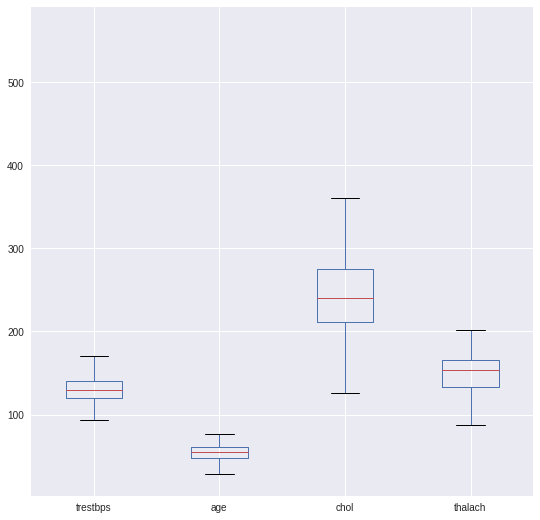

In [0]:
dataset[["trestbps", "age", "chol", "thalach"]].boxplot(figsize=(9,9))

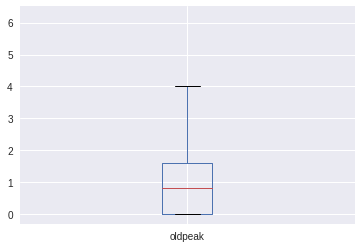

In [0]:
dataset[["oldpeak"]].boxplot()

## Data preprocess

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
standar_dataset = dataset.copy()

In [0]:
standardScaler = StandardScaler()
scale_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
standar_dataset[scale_columns] = standardScaler.fit_transform(standar_dataset[scale_columns])

In [32]:
standar_dataset[scale_columns].mean()

age         5.825923e-17
trestbps   -7.146832e-16
chol       -9.828955e-17
thalach    -5.203025e-16
oldpeak    -3.140136e-16
dtype: float64

In [33]:
dataset[scale_columns].mean()

age          54.366337
trestbps    131.623762
chol        246.264026
thalach     149.646865
oldpeak       1.039604
dtype: float64

## Models

In [0]:
feature_names = np.array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'])
X = standar_dataset[feature_names]
y = standar_dataset["target"]

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=standar_dataset["target"], random_state=0)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import itertools

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [0]:
def evaluate_confusion_matrix(y, y_predicted, name):
  model_confusion_matrix = confusion_matrix(y, y_predicted)
  
  plot_confusion_matrix(model_confusion_matrix, classes)
  
  sensitivity = model_confusion_matrix[0, 0] / (model_confusion_matrix[0, 0] + model_confusion_matrix[0, 1])
  print(f'{name} sensitivity score: {sensitivity}')
  
  specificity = model_confusion_matrix[1, 1] / (model_confusion_matrix[1, 1] + model_confusion_matrix[1, 0])
  print(f'{name} specifity score: {specificity}')

In [0]:
def plot_auc(y, y_predicted):
  fpr, tpr, thresholds = roc_curve(y, y_predicted)

  fig, ax = plt.subplots()
  ax.plot(fpr, tpr)
  ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.rcParams['font.size'] = 12
  plt.title(f'Area under the curve {auc(fpr, tpr)}')
  plt.xlabel('False Positive Rate (1 - Specificity)')
  plt.ylabel('True Positive Rate (Sensitivity)')
  plt.grid(True)

In [0]:
def train_and_evaluate_model(model, name="model"):
  model.fit(X_train, y_train)
  y_train_predicted = model.predict(X_train)
  y_val_predicted = model.predict(X_val)
  
  train_score = accuracy_score(y_train, y_train_predicted)
  print(f'{name} train accuracy score: {train_score}')
  
  validation_score = accuracy_score(y_val, y_val_predicted)
  print(f'{name} accuracy score: {validation_score}')
  
  print("-------------------------------------------")
  
  evaluate_confusion_matrix(y_val, y_val_predicted, name)
  
  print("-------------------------------------------")
  
  plot_auc(y_val, y_val_predicted)
  
  report = classification_report(y_val, y_val_predicted, target_names=classes)
  print(report)

In [0]:
classes = ["positive", "negative"]

## Random forest

Random forest train accuracy score: 1.0
Random forest accuracy score: 0.8552631578947368
-------------------------------------------
Confusion matrix, without normalization
Random forest sensitivity score: 0.8285714285714286
Random forest specifity score: 0.8780487804878049
-------------------------------------------
              precision    recall  f1-score   support

    positive       0.85      0.83      0.84        35
    negative       0.86      0.88      0.87        41

   micro avg       0.86      0.86      0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.86        76



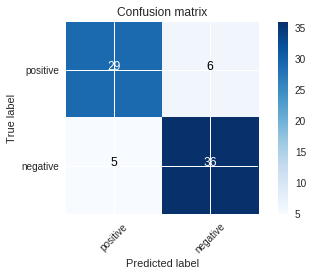

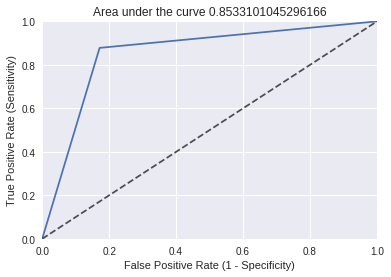

In [102]:
random_forest_model = RandomForestClassifier(n_estimators=100)
train_and_evaluate_model(random_forest_model, "Random forest")

## Gradient Boosting Classifier

Gradient Boosting train accuracy score: 1.0
Gradient Boosting accuracy score: 0.8026315789473685
-------------------------------------------
Confusion matrix, without normalization
Gradient Boosting sensitivity score: 0.7714285714285715
Gradient Boosting specifity score: 0.8292682926829268
-------------------------------------------
              precision    recall  f1-score   support

    positive       0.79      0.77      0.78        35
    negative       0.81      0.83      0.82        41

   micro avg       0.80      0.80      0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



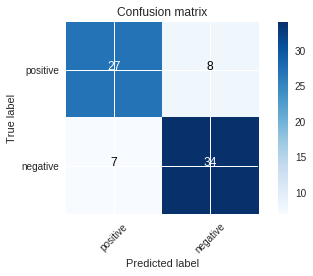

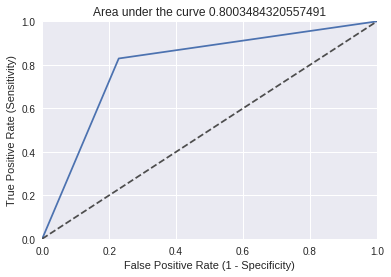

In [110]:
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100)
train_and_evaluate_model(gradient_boosting_model, "Gradient Boosting")

## Permutation importance

In [0]:
!pip install eli5

In [0]:
import eli5
from eli5.sklearn import PermutationImportance

In [44]:
perm_random_forest = RandomForestClassifier(n_estimators=100)
perm_random_forest.fit(X, y)
perm = PermutationImportance(perm_random_forest, random_state=1).fit(X, y)
eli5.show_weights(perm, feature_names=feature_names)

Weight,Feature
0.0752 ± 0.0114,cp
0.0733 ± 0.0184,ca
0.0561 ± 0.0196,thal
0.0257 ± 0.0106,oldpeak
0.0238 ± 0.0135,age
0.0231 ± 0.0132,thalach
0.0224 ± 0.0135,chol
0.0152 ± 0.0107,sex
0.0119 ± 0.0115,slope
0.0112 ± 0.0032,exang


## Recursive Feature Elimination

In [0]:
from sklearn.feature_selection import RFECV

In [88]:
random_forest_model = RandomForestClassifier(n_estimators=100)
kfold = KFold(n_splits=5, random_state=10) 

rfe = RFECV(estimator=random_forest_model, step=1, cv=kfold, scoring='accuracy')
rfe.fit(X, y)

RFECV(cv=KFold(n_splits=5, random_state=10, shuffle=False),
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

In [0]:
selected_features = rfe.get_support()
selected_features = np.array(selected_features)

In [90]:
feature_names[selected_features]

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype='<U8')

In [0]:
X = standar_dataset.drop(["target", "fbs"], axis=1)
y = standar_dataset["target"]

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=standar_dataset["target"], random_state=0)

Random forest train accuracy score: 0.947136563876652
Random forest accuracy score: 0.8552631578947368
-------------------------------------------
Confusion matrix, without normalization
Random forest sensitivity score: 0.8
Random forest specifity score: 0.9024390243902439
-------------------------------------------
              precision    recall  f1-score   support

    positive       0.88      0.80      0.84        35
    negative       0.84      0.90      0.87        41

   micro avg       0.86      0.86      0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



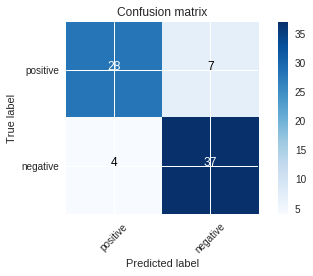

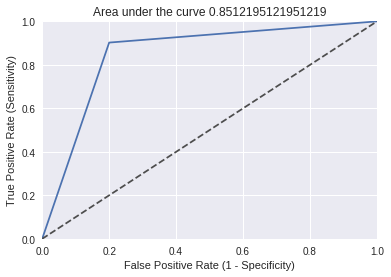

In [112]:
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=5)
train_and_evaluate_model(random_forest_model, "Random forest")

## Save forest Model

In [0]:
from sklearn.externals import joblib

In [160]:
filename = 'forest_heart_model.sav'
joblib.dump(random_forest_model, filename)

['forest_heart_model.sav']

## Load model

In [0]:
loaded_model = joblib.load(filename)

## XGboost

In [0]:
import xgboost as xgb

In [0]:
xgboost_train = xgb.DMatrix(X_train, label=y_train)
xgboost_val = xgb.DMatrix(X_val, label=y_val)

In [0]:
evallist = [(xgboost_val, 'eval'), (xgboost_train, 'train')]
params = {'max_depth': 2, 'eta': 1, 'verbosity': 2, 'objective': 'binary:logistic'}
params['nthread'] = 4
params['eval_metric'] = 'auc'

In [147]:
steps = 20
xgboost_model = xgb.train(params, xgboost_train, steps, evallist)

[0]	eval-auc:0.755749	train-auc:0.852686
[1]	eval-auc:0.841812	train-auc:0.923231
[2]	eval-auc:0.852613	train-auc:0.937715
[3]	eval-auc:0.859233	train-auc:0.951417
[4]	eval-auc:0.867944	train-auc:0.960774
[5]	eval-auc:0.862718	train-auc:0.967859
[6]	eval-auc:0.86899	train-auc:0.974554
[7]	eval-auc:0.873868	train-auc:0.976355
[8]	eval-auc:0.890592	train-auc:0.979917
[9]	eval-auc:0.888502	train-auc:0.98391
[10]	eval-auc:0.879443	train-auc:0.986729
[11]	eval-auc:0.880139	train-auc:0.987668
[12]	eval-auc:0.875958	train-auc:0.989743
[13]	eval-auc:0.876655	train-auc:0.990213
[14]	eval-auc:0.871777	train-auc:0.992092
[15]	eval-auc:0.875958	train-auc:0.994206
[16]	eval-auc:0.877352	train-auc:0.994676
[17]	eval-auc:0.876655	train-auc:0.994832
[18]	eval-auc:0.877352	train-auc:0.995615
[19]	eval-auc:0.872474	train-auc:0.99679


In [0]:
xgboost_test = xgb.DMatrix(X_val)
y_xgboost_predicted = xgboost_model.predict(xgboost_test, ntree_limit=10)

In [0]:
y_predicted_classes = np.where(y_xgboost_predicted > 0.5, 1, 0)

In [153]:
validation_score = accuracy_score(y_val, y_predicted_classes)
print(f'XGBoost validation accuracy : {validation_score}')

XGBoost validation accuracy : 0.8026315789473685


Confusion matrix, without normalization
XGBoost sensitivity score: 0.8
XGBoost specifity score: 0.8048780487804879


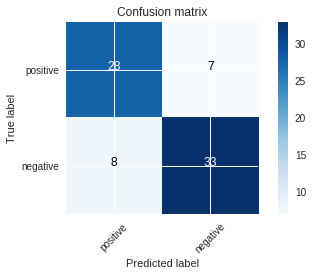

In [154]:
evaluate_confusion_matrix(y_val, y_predicted_classes, "XGBoost")

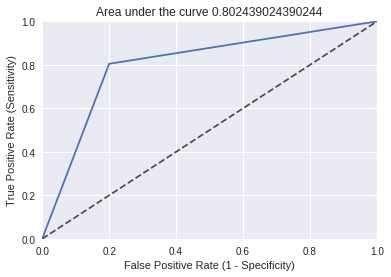

In [155]:
plot_auc(y_val, y_predicted_classes)

In [156]:
report = classification_report(y_val, y_predicted_classes, target_names=classes)
print(report)

              precision    recall  f1-score   support

    positive       0.78      0.80      0.79        35
    negative       0.82      0.80      0.81        41

   micro avg       0.80      0.80      0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



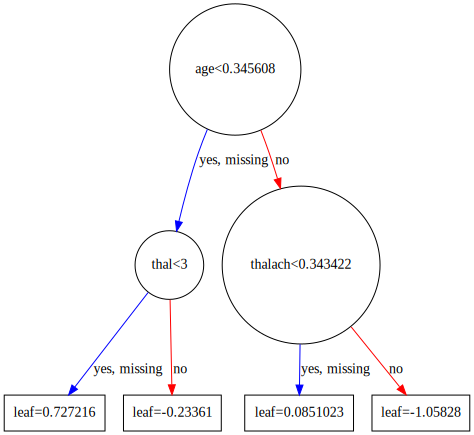

In [157]:
xgb.to_graphviz(xgboost_model, num_trees=5)

## References

https://www.kaggle.com/heyrict/clinical-data-explanation-and-standard-eda-95